In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, RobustScaler
import re

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Soot3/testing/master/loan_train1.csv")
data1 = pd.read_csv("https://raw.githubusercontent.com/Soot3/testing/master/loan_train2.csv")
df = pd.concat([data,data1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 0 to 116576
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      224808 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [ ]:
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        8346
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [ ]:
#df = df.drop(['DisbursalDate','CREDIT.HISTORY.LENGTH','PERFORM_CNS.SCORE.DESCRIPTION'], axis = 1)
#df_test = df_test.drop(['Date.of.Birth','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','PERFORM_CNS.SCORE.DESCRIPTION'], axis = 1)
df =df.dropna(axis = 0 , how = 'any')
#df_test =df_test.dropna(axis = 0 , how = 'any')

In [ ]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [ ]:
df.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
UniqueID,1.000000,0.155025,0.164295,-0.039720,-0.010776,0.014823,-0.015223,0.051851,-0.074737,0.029483,NaN,-0.009263,-0.022135,0.018799,-0.032656,-0.001241,-0.017722,-0.013774,-0.025061,-0.010048,-0.006871,-0.000933,-0.000719,-0.044455,-0.042853,-0.028505,-0.014958,-0.019955,-0.019715,-0.007404,-0.014633,-0.008071,-0.010745,0.014153,0.031503
disbursed_amount,0.155025,1.000000,0.725596,0.420500,0.018393,0.084329,0.087825,0.038644,-0.037900,-0.015223,NaN,-0.013086,0.009657,0.009581,-0.000461,0.007203,0.007435,0.031570,0.038647,0.020008,0.015845,0.004037,0.004136,-0.019834,-0.020573,-0.013911,-0.004945,-0.007143,-0.006943,0.000890,-0.007752,0.033527,0.019255,0.034647,0.086169
asset_cost,0.164295,0.725596,1.000000,-0.294500,0.023432,0.158306,-0.022268,0.275896,-0.031163,0.015246,NaN,-0.102092,0.039526,0.091079,0.019963,0.003080,-0.057955,-0.036137,-0.029917,-0.017046,-0.007165,-0.001179,-0.001254,-0.026740,-0.025849,-0.019479,-0.010585,-0.013778,-0.013569,-0.006581,-0.006347,-0.029865,-0.011480,-0.026377,0.016225
ltv,-0.039720,0.420500,-0.294500,1.000000,-0.002009,-0.101978,0.124808,-0.318001,-0.010321,-0.041392,NaN,0.115296,-0.029863,-0.104528,-0.025710,0.007457,0.090854,0.093497,0.096302,0.054177,0.030618,0.007242,0.007451,0.011250,0.008414,0.008868,0.008773,0.010352,0.010314,0.008967,-0.001458,0.088829,0.044719,0.087880,0.102573
branch_id,-0.010776,0.018393,0.023432,-0.002009,1.000000,0.137740,-0.032126,0.062103,0.134698,-0.074497,NaN,-0.072537,0.029175,0.046128,-0.005410,-0.004361,0.004119,-0.004960,0.000981,-0.003547,0.004411,-0.000369,-0.000484,-0.007299,-0.006401,-0.007553,-0.001580,-0.000735,-0.000617,0.003206,0.000855,-0.003431,0.001290,0.008064,0.024462
supplier_id,0.014823,0.084329,0.158306,-0.101978,0.137740,1.000000,-0.055562,0.200162,0.078072,-0.012282,NaN,-0.108529,0.040726,0.103031,-0.000394,-0.009075,-0.077431,-0.070714,-0.066961,-0.045403,-0.016371,-0.008328,-0.008448,-0.028976,-0.023091,-0.015565,-0.010825,-0.012675,-0.012538,-0.011046,-0.008226,-0.054957,-0.024238,-0.032784,0.027692
manufacturer_id,-0.015223,0.087825,-0.022268,0.124808,-0.032126,-0.055562,1.000000,-0.156607,0.002785,-0.010823,NaN,0.080851,-0.048550,-0.083121,-0.007216,0.013552,0.079712,0.079688,0.079682,0.034675,0.034855,0.015568,0.015384,0.009355,0.005407,0.005845,0.005885,0.005198,0.005339,0.016725,0.005087,0.058837,0.022709,0.015548,-0.026277
Current_pincode_ID,0.051851,0.038644,0.275896,-0.318001,0.062103,0.200162,-0.156607,1.000000,0.144821,0.056010,NaN,-0.322872,0.008373,0.283881,0.045052,-0.014020,-0.172671,-0.103296,-0.136768,-0.070335,-0.062978,-0.020286,-0.020191,-0.062139,-0.058335,-0.045508,-0.022545,-0.029461,-0.028944,-0.005032,-0.009123,-0.116986,-0.068614,-0.066459,0.024777
State_ID,-0.074737,-0.037900,-0.031163,-0.010321,0.134698,0.078072,0.002785,0.144821,1.000000,-0.026640,NaN,-0.233044,0.134343,0.210773,0.033244,-0.003493,-0.059919,-0.019802,-0.033830,-0.014810,-0.012054,-0.005570,-0.005364,0.032304,0.033998,0.017727,0.013069,0.018455,0.018240,0.013686,0.013068,-0.029130,-0.001962,-0.012820,0.058168
Employee_code_ID,0.029483,-0.015223,0.015246,-0.041392,-0.074497,-0.012282,-0.010823,0.056010,-0.026640,1.000000,NaN,-0.050568,0.021656,0.051565,0.016453,0.002129,-0.014701,-0.011342,-0.017473,-0.010848,-0.008167,-0.007083,-0.007093,0.002266,0.003339,0.004473,0.000350,0.002223,0.002275,-0.004612,0.001468,-0.012012,-0.006632,-0.009341,-0.002468


In [ ]:
features = set()
matrix=df.corr()

for i in range(len(matrix.columns)):
    for j in range(i):
        if abs(matrix.iloc[i,j]) >=0.7:
            colname = matrix.columns[i]
            features.add(colname)
    
print(features)

{'VoterID_flag', 'SEC.ACTIVE.ACCTS', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'asset_cost', 'PRI.DISBURSED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'SEC.SANCTIONED.AMOUNT', 'PRI.ACTIVE.ACCTS'}


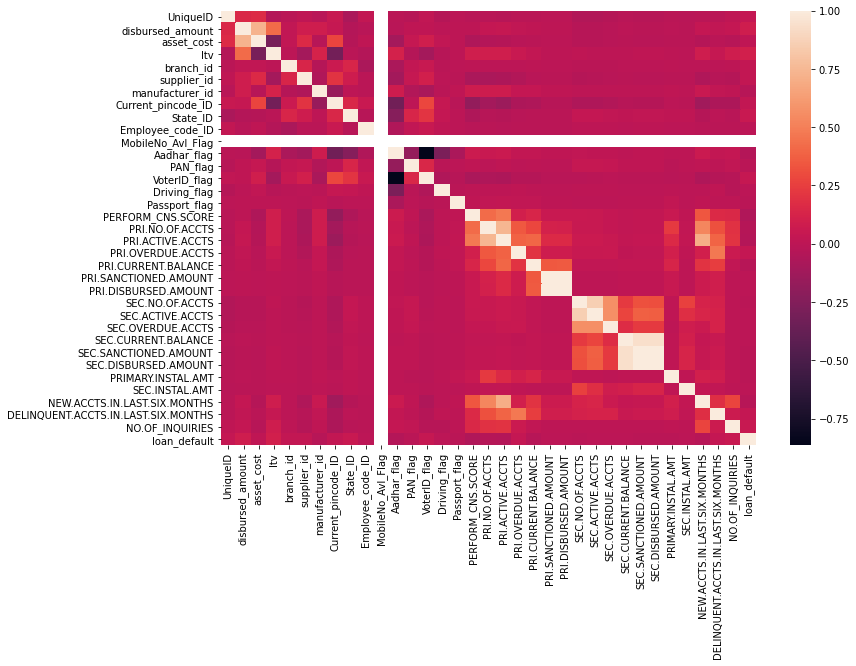

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [ ]:
def age(dob):
    yr = int(dob[-2:])
    if yr >=0 and yr < 20:
        return yr + 2000
    else:
         return yr + 1900

df['Date.of.Birth'] = df['Date.of.Birth'].apply(age)
df['DisbursalDate'] = df['DisbursalDate'].apply(age)

df['Age'] = df['DisbursalDate'] - df['Date.of.Birth']
df = df.drop( ['DisbursalDate', 'Date.of.Birth'], axis=1)

In [ ]:
df['AVERAGE.ACCT.AGE_yrs'] = df['AVERAGE.ACCT.AGE'].apply(lambda x: re.search(r'\d+(?=yrs)', x).group(0)).astype(np.int)
df['AVERAGE.ACCT.AGE_mon'] = df['AVERAGE.ACCT.AGE'].apply(lambda x: re.search(r'\d+(?=mon)', x).group(0)).astype(np.int)
df = df.drop('AVERAGE.ACCT.AGE', axis=1)

df['CREDIT.HISTORY.LENGTH_yrs'] = df['CREDIT.HISTORY.LENGTH'].apply(lambda x: re.search(r'\d+(?=yrs)', x).group(0)).astype(np.int)
df['CREDIT.HISTORY.LENGTH_mon'] = df['CREDIT.HISTORY.LENGTH'].apply(lambda x: re.search(r'\d+(?=mon)', x).group(0)).astype(np.int)
df = df.drop('CREDIT.HISTORY.LENGTH', axis=1)

In [ ]:
pri_columns = ['PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS',
           'PRI.ACTIVE.ACCTS','SEC.ACTIVE.ACCTS',
           'PRI.OVERDUE.ACCTS','SEC.OVERDUE.ACCTS',
           'PRI.CURRENT.BALANCE','SEC.CURRENT.BALANCE',
           'PRI.SANCTIONED.AMOUNT','SEC.SANCTIONED.AMOUNT',
           'PRI.DISBURSED.AMOUNT','SEC.DISBURSED.AMOUNT',
           'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT']

In [ ]:
#Creating and Sorting Columns

df['NO_OF_ACCTS'] = df['PRI.NO.OF.ACCTS'] + df['SEC.NO.OF.ACCTS']

df['ACTIVE_ACCTS'] = df['PRI.ACTIVE.ACCTS'] + df['SEC.ACTIVE.ACCTS']

df['OVERDUE_ACCTS'] = df['PRI.OVERDUE.ACCTS'] + df['SEC.OVERDUE.ACCTS']

df['CURRENT_BALANCE'] = df['PRI.CURRENT.BALANCE'] + df['SEC.CURRENT.BALANCE']

df['SANCTIONED_AMOUNT'] = df['PRI.SANCTIONED.AMOUNT'] + df['SEC.SANCTIONED.AMOUNT']

df['Total_AMOUNT'] = df['PRI.DISBURSED.AMOUNT'] + df['SEC.DISBURSED.AMOUNT']

df['INSTAL_AMT'] = df['PRIMARY.INSTAL.AMT'] + df['SEC.SANCTIONED.AMOUNT']

df['INACTIVE_ACCTS'] = df['NO_OF_ACCTS'] - df['ACTIVE_ACCTS']

df.drop(pri_columns, axis=1, inplace=True)

In [ ]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Age,AVERAGE.ACCT.AGE_yrs,AVERAGE.ACCT.AGE_mon,CREDIT.HISTORY.LENGTH_yrs,CREDIT.HISTORY.LENGTH_mon,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,Total_AMOUNT,INSTAL_AMT,INACTIVE_ACCTS
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,1998,1,1,0,0,0,0,598,I-Medium Risk,0,1,0,1,33,1,11,1,11,1,1,1,27600,50200,50200,1991,0
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,1998,1,1,0,0,0,0,305,L-Very High Risk,0,0,1,1,25,0,8,1,3,3,0,0,0,0,0,31,3
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,1,1,41,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
columns_unique = ['UniqueID','MobileNo_Avl_Flag',
         'Current_pincode_ID','Employee_code_ID',
         'NO.OF_INQUIRIES','State_ID',
         'branch_id','manufacturer_id','supplier_id', 'Driving_flag',	'Passport_flag']
df = df.drop(columns=columns_unique)

In [ ]:
df.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,loan_default,Age,AVERAGE.ACCT.AGE_yrs,AVERAGE.ACCT.AGE_mon,CREDIT.HISTORY.LENGTH_yrs,CREDIT.HISTORY.LENGTH_mon,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,Total_AMOUNT,INSTAL_AMT,INACTIVE_ACCTS
0,50578,58400,89.55,Salaried,1,0,0,0,No Bureau History Available,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,Self employed,1,0,0,598,I-Medium Risk,0,1,1,33,1,11,1,11,1,1,1,27600,50200,50200,1991,0
2,53278,61360,89.63,Self employed,1,0,0,0,No Bureau History Available,0,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,Self employed,1,0,0,305,L-Very High Risk,0,0,1,25,0,8,1,3,3,0,0,0,0,0,31,3
4,52378,60300,88.39,Self employed,1,0,0,0,No Bureau History Available,0,0,1,41,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
objects = df.select_dtypes('object').columns.tolist()
objects


['Employment.Type', 'PERFORM_CNS.SCORE.DESCRIPTION']

In [ ]:
le = LabelEncoder()
df[objects] = df[objects].apply(le.fit_transform) 

In [ ]:
df.corr()

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,loan_default,Age,AVERAGE.ACCT.AGE_yrs,AVERAGE.ACCT.AGE_mon,CREDIT.HISTORY.LENGTH_yrs,CREDIT.HISTORY.LENGTH_mon,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,Total_AMOUNT,INSTAL_AMT,INACTIVE_ACCTS
disbursed_amount,1.000000,0.725596,0.420500,-0.025505,-0.013086,0.009657,0.009581,0.007435,0.003853,0.033527,0.019255,0.086169,-0.053663,-0.002642,0.013321,0.009296,0.013420,0.028503,0.034075,0.016311,0.014328,0.003551,0.003665,-0.005548,0.020464
asset_cost,0.725596,1.000000,-0.294500,0.063773,-0.102092,0.039526,0.091079,-0.057955,0.052644,-0.029865,-0.011480,0.016225,-0.108255,-0.011434,-0.042471,-0.025531,-0.040937,-0.039061,-0.033635,-0.020636,-0.009224,-0.002088,-0.002146,-0.015079,-0.034547
ltv,0.420500,-0.294500,1.000000,-0.118076,0.115296,-0.029863,-0.104528,0.090854,-0.066742,0.088829,0.044719,0.102573,0.068009,0.013565,0.078458,0.049450,0.076768,0.093523,0.095276,0.054176,0.031611,0.007906,0.008109,0.013451,0.075374
Employment.Type,-0.025505,0.063773,-0.118076,1.000000,-0.093554,0.006931,0.092915,-0.044879,0.049307,-0.004478,0.002471,0.023441,0.091464,0.005241,-0.027446,-0.004963,-0.030331,0.007299,-0.004393,0.021548,0.020405,0.011257,0.011318,0.006112,0.011772
Aadhar_flag,-0.013086,-0.102092,0.115296,-0.093554,1.000000,-0.171280,-0.864523,0.072770,-0.059547,0.061619,0.025135,-0.038719,0.019439,-0.000598,0.056900,0.032711,0.054106,0.056527,0.065085,0.028521,0.028441,0.012328,0.012308,0.014260,0.041825
PAN_flag,0.009657,0.039526,-0.029863,0.006931,-0.171280,1.000000,0.144960,0.014533,-0.011016,0.014386,0.005647,-0.005318,-0.014032,0.022207,0.011712,0.022054,0.015032,0.007222,0.020914,0.003815,0.004823,0.001307,0.001605,0.011172,-0.000928
VoterID_flag,0.009581,0.091079,-0.104528,0.092915,-0.864523,0.144960,1.000000,-0.072546,0.058424,-0.060142,-0.027935,0.040585,-0.017086,-0.006799,-0.057411,-0.040253,-0.054219,-0.058279,-0.068387,-0.029385,-0.032876,-0.013656,-0.013649,-0.014632,-0.042481
PERFORM_CNS.SCORE,0.007435,-0.057955,0.090854,-0.044879,0.072770,0.014533,-0.072546,1.000000,-0.950577,0.343726,0.159091,-0.055298,0.154728,0.333973,0.691381,0.405323,0.656939,0.423659,0.468664,0.106390,0.137532,0.059758,0.059225,0.053462,0.322994
PERFORM_CNS.SCORE.DESCRIPTION,0.003853,0.052644,-0.066742,0.049307,-0.059547,-0.011016,0.058424,-0.950577,1.000000,-0.252274,-0.054673,0.068626,-0.120169,-0.230309,-0.589455,-0.289172,-0.555310,-0.324524,-0.340641,0.028805,-0.091151,-0.041829,-0.041142,-0.036600,-0.256553
NEW.ACCTS.IN.LAST.SIX.MONTHS,0.033527,-0.029865,0.088829,-0.004478,0.061619,0.014386,-0.060142,0.343726,-0.252274,1.000000,0.178483,-0.023367,0.021833,-0.037728,0.274729,0.170114,0.250637,0.535319,0.710061,0.112055,0.202909,0.075030,0.074774,0.091254,0.349440


In [ ]:
features = set()
matrix=df.corr()

for i in range(len(matrix.columns)):
    for j in range(i):
        if abs(matrix.iloc[i,j]) >=0.7:
            colname = matrix.columns[i]
            features.add(colname)
    
print(features)

{'VoterID_flag', 'Total_AMOUNT', 'asset_cost', 'INACTIVE_ACCTS', 'ACTIVE_ACCTS', 'PERFORM_CNS.SCORE.DESCRIPTION', 'CREDIT.HISTORY.LENGTH_yrs'}


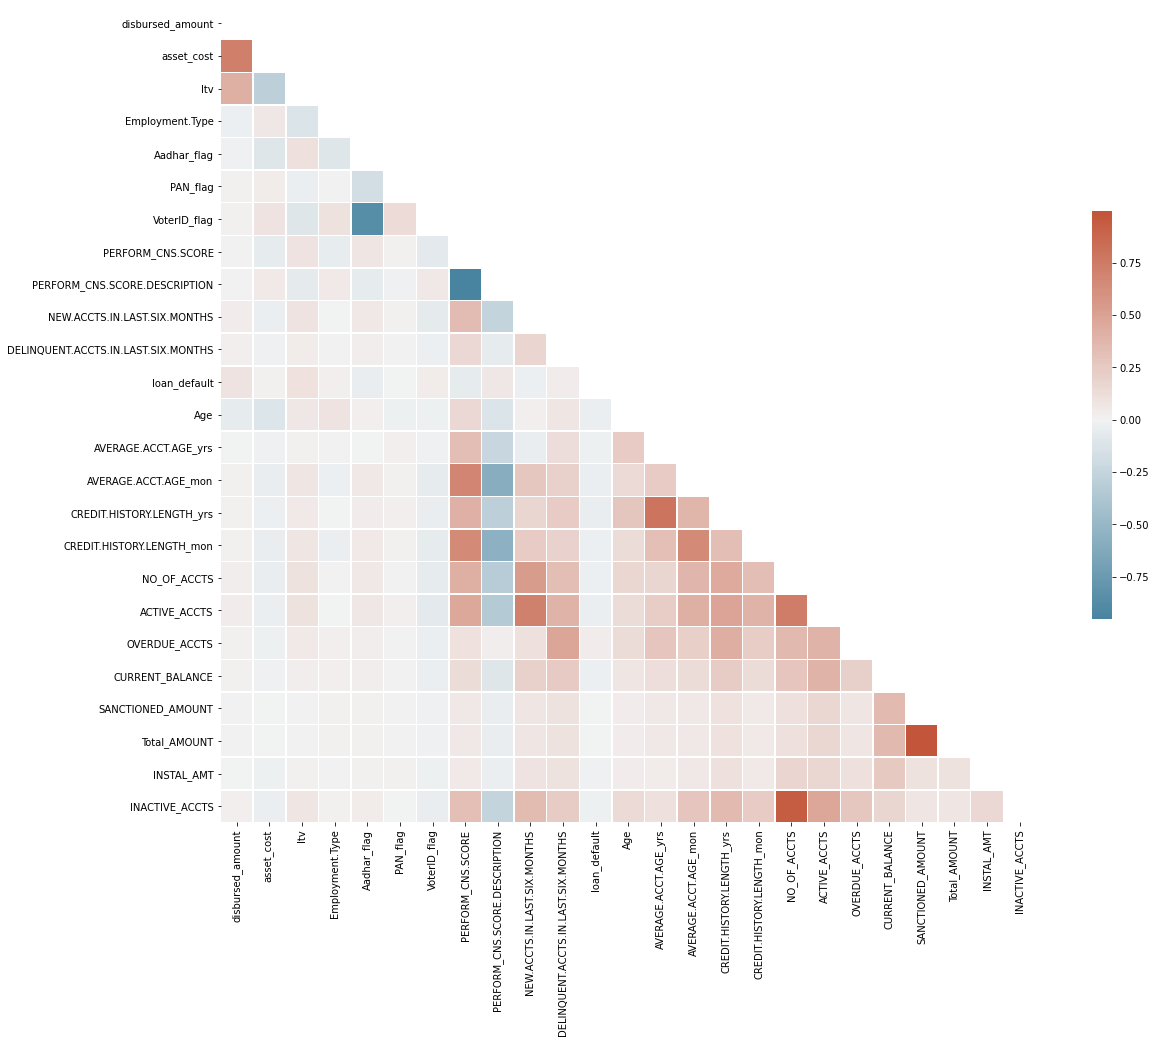

In [ ]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
X = df.drop(['loan_default','asset_cost', 'Total_AMOUNT', 'CREDIT.HISTORY.LENGTH_yrs', 'NO_OF_ACCTS','VoterID_flag','PERFORM_CNS.SCORE'], axis=1)
y = df['loan_default']

In [ ]:
X.head()

,disbursed_amount,ltv,Employment.Type,Aadhar_flag,PAN_flag,PERFORM_CNS.SCORE.DESCRIPTION,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,Age,AVERAGE.ACCT.AGE_yrs,AVERAGE.ACCT.AGE_mon,CREDIT.HISTORY.LENGTH_mon,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,INSTAL_AMT,INACTIVE_ACCTS
0,50578,89.55,0,1,0,13,0,0,34,0,0,0,0,0,0,0,0,0
1,47145,73.23,1,1,0,8,0,1,33,1,11,11,1,1,27600,50200,1991,0
2,53278,89.63,1,1,0,13,0,0,33,0,0,0,0,0,0,0,0,0
3,57513,88.48,1,1,0,11,0,0,25,0,8,3,0,0,0,0,31,3
4,52378,88.39,1,1,0,13,0,0,41,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = RobustScaler()
X = scaler.fit_transform(X)


# Split the data into training and testing sets 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state = 33)

print(x_train.shape[0], x_test.shape[0])

157365 67443


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())
print(x_train.shape, y_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(249936, 18) (249936,)


In [ ]:
accuracy = {}
roc_r = {}

def train_model(model, model_name):
    print(model_name)
    
    # Fitting model
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    #Model accuracy
    acc = accuracy_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('accuracy_score',acc)
    print('precision_score',precision_score(y_test, pred)*100)
    print('recall_score',recall_score(y_test, pred)*100)
    print('f1_score',f1_score(y_test, pred)*100)
    
    
    #ROC Score
    roc_score = roc_auc_score(y_test, pred)*100
    roc_r[model_name] = roc_score
    print('roc_auc_score',roc_score)
    
    # Confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    
    #ROC Score
    fpr, tpr, threshold = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)*100
    
    #ROC Plot
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

GradientBoostingClassifier
accuracy_score 92.71681271592308
precision_score 88.90238611713666
recall_score 73.82376251891347
f1_score 80.66446228940323
roc_auc_score 85.71798237214436
confusion_matrix
       0      1
0  52285   1279
1   3633  10246


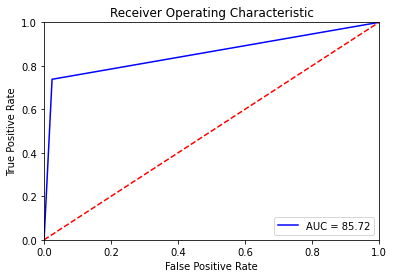

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=1000, min_samples_split=5, max_depth=15)

train_model(gbc, 'GradientBoostingClassifier')

XGBClassifier
accuracy_score 87.57617543703572
precision_score 76.34604330331481
recall_score 57.41768138914908
f1_score 65.54262450137765
roc_auc_score 76.40412110679169
confusion_matrix
       0     1
0  51095  2469
1   5910  7969


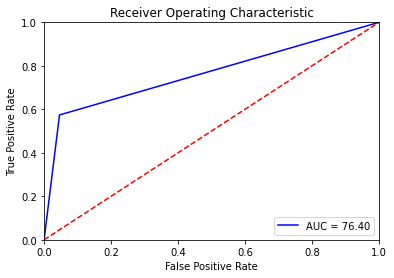

In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 1500, nthread  = 4, max_depth = 15, min_child_weight = 5, learning_rate=0.1)

train_model(xgb, 'XGBClassifier')

In [41]:
!pip install catboost

     |████████████████████████████████| 65.7MB 57kB/s 


Cat Boost
accuracy_score 76.45419094642884
precision_score 36.76412223839132
recall_score 20.023056416168313
f1_score 25.925925925925924
roc_auc_score 55.54957615073221
confusion_matrix
       0     1
0  48784  4780
1  11100  2779


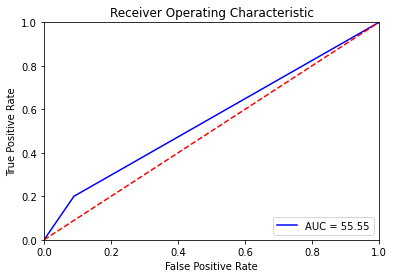

In [42]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(verbose = 0)

train_model(cat, "Cat Boost")

In [ ]:
importance=gbc.feature_importances_

Text(0.5, 1.0, 'Feature Importance')

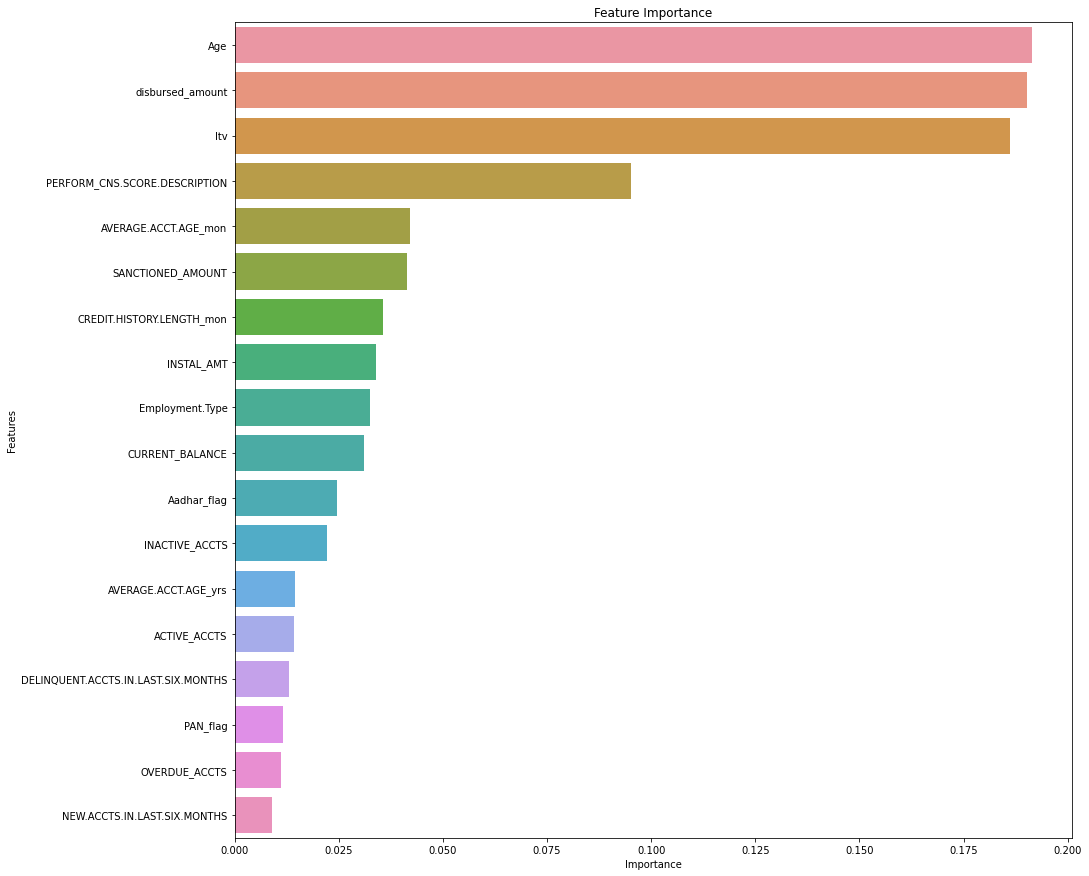

In [44]:

import seaborn as sns
lis = []
# summarize feature importance
for i,v in enumerate(importance):
    lis.append(v)
X = df.drop(['loan_default','asset_cost', 'Total_AMOUNT', 'CREDIT.HISTORY.LENGTH_yrs', 'NO_OF_ACCTS','VoterID_flag','PERFORM_CNS.SCORE'], axis=1)
dic = {"Features":X.columns, 'Importance':lis}
df = pd.DataFrame(dic)

plo=df.sort_values('Importance', ascending=False)
plt.subplots(1,figsize=(15,15))
sns.barplot(data=plo, y='Features', x='Importance').set_title('Feature Importance')